In [ ]:
# Saketh Ayyagari

# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def calculate_derivatives(potential_values): # find partial derivatives of voltage with respect to X and Y directions
    potential_values = np.array(potential_values)
    dy = np.zeros_like(potential_values)  # partial derivative with respect to Y
    dx = np.zeros_like(potential_values)  # partial derivative with respect to X

    rows, cols = potential_values.shape

    for i in range(rows):
        for j in range(cols):
            # Partial derivative with respect to X
            if j == 0:  # Forward difference for left column
                dx[i, j] = potential_values[i, j+1] - potential_values[i, j]
            elif j == cols - 1:  # Backward difference for right column
                dx[i, j] = potential_values[i, j] - potential_values[i, j-1]
            else:  # Central difference for inner points
                dx[i, j] = (potential_values[i, j+1] - potential_values[i, j-1]) / 2

            # Partial derivative with respect to Y
            if i == 0:  # Forward difference for top row
                dy[i, j] = potential_values[i+1, j] - potential_values[i, j]
            elif i == rows - 1:  # Backward difference for bottom row
                dy[i, j] = potential_values[i, j] - potential_values[i-1, j]
            else:  # Central difference for inner points
                dy[i, j] = (potential_values[i+1, j] - potential_values[i-1, j]) / 2

    return dx, dy

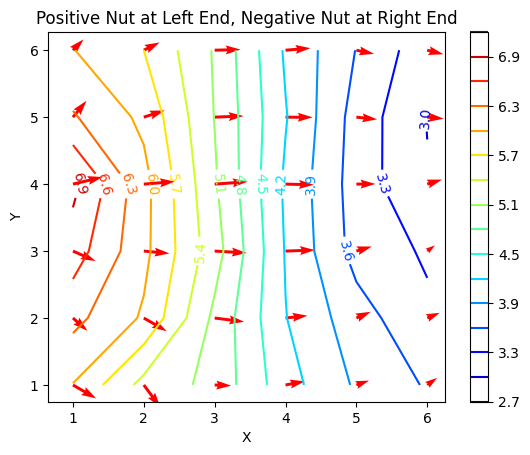

In [ ]:
# TRIAL 1: Positive nut is on the left, Negative nut is on the right

# given coordinates of where potential V was calculated, generate 2 coordinate matrices of (X, Y) pairs.
X, Y = np.meshgrid([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]) # generates two matrices whose entries in the X and Y matrices make up xy pairs on the graph

POTENTIAL_VALUES1 = [[5.99, 5.3, 5.01, 4.32, 3.86, 3.57],
                    [6.39, 5.96, 5.03, 4.21, 3.73, 3.36],
                    [6.75, 6.08, 5.23, 4.18, 3.49, 3.26],
                    [6.98, 6.1, 5.14, 4.15, 3.46, 3.02],
                    [6.33, 5.93, 5.09, 4.22, 3.48, 2.99],
                    [6.01, 5.7, 5.07, 4.16, 3.59, 3.11]]
# calculating electric field components (partial derivatives of potential) at each coordinate
dx, dy = calculate_derivatives(POTENTIAL_VALUES1)
# Ex = -dV/dX (and respectively in the Y-direction)
Ex = -dx
Ey = -dy

equipotential_lines = plt.contour(X, Y, POTENTIAL_VALUES1, 13, cmap='jet') # generate contour map of equipotential lines
plt.clabel(equipotential_lines, inline=True, fontsize=10) # labeling numbers on the graph
# generate a bar of colors and what potential values they represent
plt.colorbar()
# generating vector field
plt.quiver(X, Y, Ex, Ey, color='r') # generates vectors at each point on the meshgrid

plt.title("Positive Nut at Left End, Negative Nut at Right End")
plt.xlabel("X")
plt.ylabel("Y")
# x and y limits for the graph
plt.xlim(0.65, 6.25)
plt.ylim(0.75, 6.27)
plt.show()

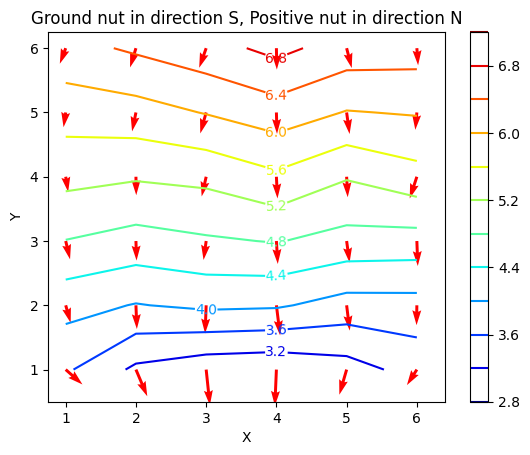

In [ ]:
# TRIAL 2: NORTH AND SOUTH
# given coordinates of where potential V was calculated, generate 2 coordinate matrices of (X, Y) pairs.
X, Y = np.meshgrid([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6])
POTENTIAL_VALUES2 = [[6.27, 6.46, 6.65, 6.91, 6.62, 6.58],
                    [5.77, 5.84, 6.02, 6.22, 5.98, 6.03],
                    [5.32, 5.24, 5.3, 5.53, 5.23, 5.46],
                    [4.79, 4.65, 4.75, 4.82, 4.66, 4.63],
                    [4.14, 3.98, 4.08, 4.05, 3.84, 3.85],
                    [3.66, 3.12, 2.93, 2.88, 3.03, 3.35]][::-1] # top left = (1, 1), bottom right = (6, 6)
# calculating electric field components for each pair
dx, dy = calculate_derivatives(POTENTIAL_VALUES2)
# Ex = -dV/dX (and respectively in the Y-direction)
Ex = -dx
Ey = -dy

# generating contour map and labels on equipotential lines
equipotential_lines = plt.contour(X, Y, POTENTIAL_VALUES2, 10, cmap='jet')
plt.clabel(equipotential_lines, inline=True, fontsize=10)
# colored bar to further show values of equipotential lines
plt.colorbar()
# generating vector field
plt.quiver(X, Y, Ex, Ey, color='r') # generates vectors at each point on the meshgrid

plt.title("Ground nut in direction S, Positive nut in direction N")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0.75, 6.4)
plt.ylim(0.5, 6.25)
plt.show()